In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# (...although Numpy is actually not strictly needed for this Assignment...)

# Needed to make plots display at a decent size:
plt.rcdefaults()

# Change default view setting, so you can see all the rows
# in the DataFrame at once, needed for initial inspection:
pd.set_option("display.max_rows", None)

# Read in the data from the Wikipedia HTML page: 
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")

# The 2nd element of 'tables' (so index 1) is the actual
# list of CO2 emissions per country that we need:
emissions = tables[1]

# Rename the columns:
emissions.columns = ['country', '1990', '2005', '2017', 'world_%', \
                     'change_%', 'per_area', 'per_capita', '2018_w_L', '2018_wo_L']

# Drop row with index 67, which has data for the EU (= not a country).
# Then drop the first three rows, which contain data for the entire world combined.
# (And important to do these drops in this order, otherwise it gets messed up.)
# Both times, we name the shortened DataFrame 'emissions' again, 
# so that the 4 rows are now in effect deleted:

emissions = emissions.drop(index=emissions.index[67])
emissions = emissions.drop(index=emissions.index[0:3])

    # The same could also be accomplished with:
# emissions1 = emissions.loc[3:66]
# emissions2 = emissions.loc[68:]
# emissions = pd.concat([emissions1, emissions2])

    # Or also with this boolean mask:
# mask = emissions.country.str.contains('World') | emissions.country.str.contains('European')
# emissions = emissions.loc[~mask]

# Note to Winc instructors: this time I haven't removed the rows with
# the 'dependent territories' (such as Anguilla, Faroer Islands, Greenland, etc.),
# as was still requested in the earlier 'pandas exercise countries', because those
# territories are not clearly identified in this Wikipedia list.
# It would be helpful by the way if the Assignment text would mention
# this more clearly, i.e. that it's OK to leave in the dependent territories.

# Show the entire DataFrame for inspection:
emissions


,country,1990,2005,2017,world_%,change_%,per_area,per_capita,2018_w_L,2018_wo_L
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
8,Antigua and Barbuda,0.223,0.283,0.624,0.00%,179.8%,1412.0,6.1,0.53,0.53
9,Argentina,112.434,165.429,209.968,0.57%,86.7%,76.0,4.7,207.11,177.41
10,Armenia,20.699,4.542,4.832,0.01%,-76.7%,162.0,1.6,5.59,5.55
11,Aruba,0.297,0.470,0.959,0.00%,222.9%,5328.0,9.1,NaN,NaN
12,Australia,275.408,391.590,402.253,1.08%,46.1%,52.0,16.5,388.81,386.62


In [10]:
# For remainder of this Notebook, reset the DataFrame view
# back to default:
pd.set_option("display.max_rows", 10)

# Sort countries by 2017 CO2 emissions, 
# with largest emitters on top; and name this sorted
# DataFrame 'emissions' again, to save this sorting:
emissions = emissions.sort_values(by='2017', ascending=False)

# Assign a separate DataFrame to just the top 5 emitters,
# to use in Graph 1:
top_5 = emissions.iloc[:5]

# Show the top_5 DataFrame:
top_5

# Note to Winc instructors: even though the Assignment text
# says to take the most recent year if those data are available,
# (to sort the largest 5 emitters on top), i.e. 2018 in this case,
# it's not possible (yet) to sort those by numerical value, bcs.
# it looks like those CO2 emissions are read in as strings - thus when sorted,
# it shows the data that start with the digit '9' on top (Belgium) rather than the largest value.
# This could be resolved by changing data type, but on top of that, it's not clear whether
# to take the 2018_w_L or 2018_wo_L data (although the latter is more likely).
# So just to avoid confusion, I've just sorted on 2017 emissions,
# which are read in as floating numbers, and ignored 2018 data
# for the remainder of the assignment.


,country,1990,2005,2017,world_%,change_%,per_area,per_capita,2018_w_L,2018_wo_L
42,China,2397.048,6263.064,10877.218,29.34%,353.8%,1133.0,7.7,9663.36,10313.46
202,United States,5085.897,5971.571,5107.393,13.77%,0.4%,519.0,15.7,4749.57,4981.30
93,India,605.968,1210.754,2454.774,6.62%,305.1%,747.0,1.8,2400.25,2434.52
158,Russia,2378.921,1733.950,1764.866,4.76%,-25.8%,103.0,12.3,1049.05,1607.55
102,Japan,1149.400,1276.863,1320.776,3.56%,14.9%,3494.0,10.4,1074.08,1106.15


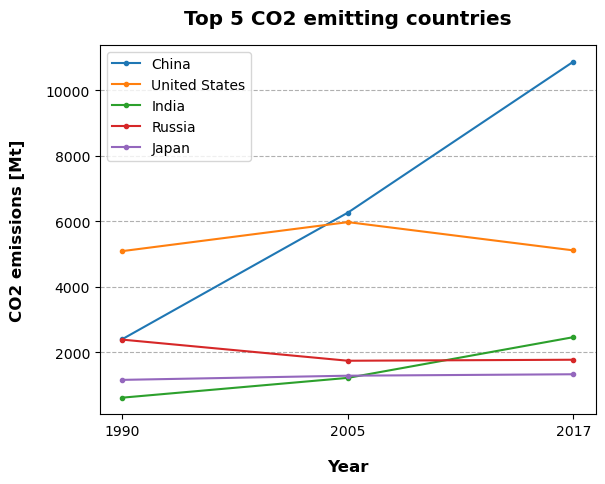

In [11]:
# GRAPH 1: CO2 of the bigger countries

# Define the x-axis values:
years = top_5.columns[1:4]

fig, ax = plt.subplots()

# Replot a line, with the corresponding country label,
# for each row in the 'top_5' DataFrame:
for index, row in top_5.iterrows():
    ax.plot(years, row[1:4], label=row[0], marker='.')

# Setting the axis labels; the labelpad property sets the distance to the chart
ax.set_xlabel('Year', weight='bold', size='large', labelpad=15)
ax.set_ylabel('CO2 emissions [Mt]', weight='bold', size='large', labelpad=15)
ax.set_title('Top 5 CO2 emitting countries', weight='bold', size='x-large', pad=15)

# Show legend (default position is inside, on the upper left)
# and y-grid:
ax.legend()
ax.grid(True, axis='y', linestyle = '--')


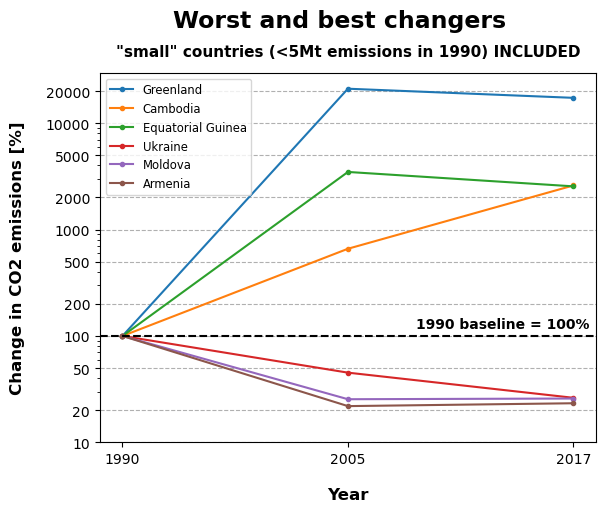

In [12]:
# GRAPH 2A: worst and best changers - small countries included

# First add two columns, to show relative change (as %) in 2005 and 2017,
# with respect to the 'baseline' emission of a country in 1990 (= 100%);
# And before that a 3rd baseline column for 1990, with just the value 100%
# for each country (needed for the graph).

emissions['1990_baseline_%'] = 100
emissions['2005_delta_%'] = 100 * emissions['2005'] / emissions['1990']
emissions['2017_delta_%'] = 100 * emissions['2017'] / emissions['1990']


# Sort countries by relative change in CO2 emissions
# in 2017 compared to the 1990 baseline, with best changers
# (= smallest relative increase in CO2) on top;
# and name this sorted DataFrame 'emissions' again, to save this sorting:
emissions = emissions.sort_values(by='2017_delta_%')

# [Note to Winc instructors: the Assignment text doesn't 
# specifically mention that we should sort on 2017 relative change,
# instead of on 2005 relative change. Although this makes the most sense, 
# it would be helpful if this were added for clarity.]
# 
# Note 2: an alternative to obtaining the 2017 relative change values
# would be to simply take the column 'change_%' from the Wikipedia data
# (which is already the relative change in 2017 compared to 1990)
# and add 100 to it, because the Wikipedia data takes the 1990 baseline to be 0%.


# Assign a separate DataFrame to just the 3 best
# and 3 worst changers, to use in Graph 2A:
best_changers = emissions.iloc[:3]
worst_changers = emissions.iloc[-3:]
best_and_worst = pd.concat([best_changers, worst_changers])

# Reverse the row order, to make the legend easier to read
# (for full explanation, pls. see the next cell for graph 2B).
best_and_worst = best_and_worst[::-1]

# Define the x-axis values:
years = best_and_worst.columns[1:4]
# (..although we could have also used the 'years' series from the previous cell/graph..)

fig, ax = plt.subplots()

# Replot a line, with the corresponding country label,
# for each row in the 'best_and_worst' DataFrame:
for index, row in best_and_worst.iterrows():
    ax.plot(years, row[-3:], label=row[0], marker='.')

# Make the y-axis a logarithmic scale, so that the best countries
# (the ones that decreased their CO2 emissions) can still be read comfortably.
# Import the matplotlib.ticker module, so we can set our own scale
# for easier reading of the chart (instead of the default scientific notation).
import matplotlib.ticker
ax.set_yscale('log')
ax.set_yticks([10, 20, 50, 100, 200, 500, 1_000, 2_000, 5_000, 10_000, 20_000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Add a black dashed 1990 baseline at level 100%, with accompanying text:
ax.axhline(y=100, linestyle='--', color='black')
ax.text(1.3, 120, '1990 baseline = 100%', weight='bold', size='medium')

# Setting the axis labels. The labelpad property sets the distance to the chart:
ax.set_xlabel('Year', weight='bold', size='large', labelpad=15)
ax.set_ylabel('Change in CO2 emissions [%]', weight='bold', size='large', labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle('Worst and best changers', weight='bold', y=1.013, fontsize=17)
plt.title('"small" countries (<5Mt emissions in 1990) INCLUDED', weight='bold', fontsize=11, pad=12)

# Show legend (with smaller fontsize, to make it fit into the upper left)
# and y-grid:
ax.legend(loc='upper left', fontsize='small')
ax.grid(True, axis='y', linestyle = '--')



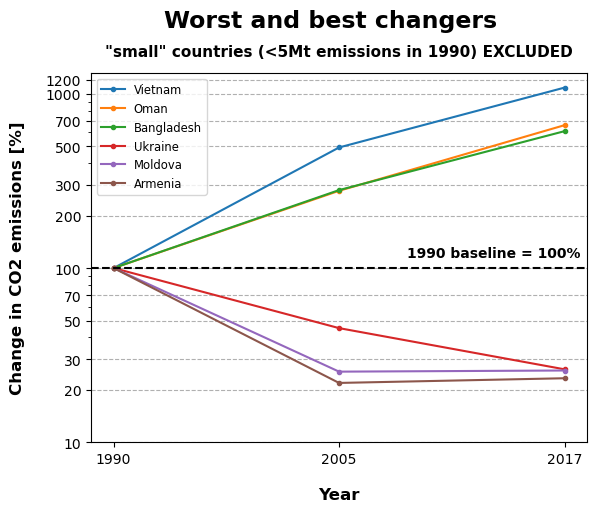

In [13]:
# GRAPH 2B: worst and best changers - small countries excluded

# Apply boolean mask to filter out the "small" countries
# (= with less than 5 Mt emissions in 1990).  Note that the sorting
# with best changers in 2017 on top is still saved from the previous cell.
mask_large = emissions['1990'] >= 5
emissions_large = emissions[mask_large]

# Assign a separate DataFrame to just the 3 best
# and 3 worst changers, to use in Graph 2A:
best_changers_large = emissions_large.iloc[:3]
worst_changers_large = emissions_large.iloc[-3:]
best_and_worst_large = pd.concat([best_changers_large, worst_changers_large])

# Now change the order to show the worst changers
# (= largest emitters) on top, in order to make
# the legend easier to read. This is bcs. the order of countries
# in the legend (from top to bottom) is the same as the order
# in which they are plotted.  So if we ensure that the largest emitters (highest lines)
# are plotted first in the FOR loop below (by reversing the order), the legend countries
# line up with the order of the lines from top to bottom.
best_and_worst_large = best_and_worst_large[::-1]

# Define the x-axis values:
years = best_and_worst_large.columns[1:4]
# (..although we could have also used the 'years' series from the previous cells/graphs..)

fig, ax = plt.subplots()

# Replot a line, with the corresponding country label,
# for each row in the 'best_and_worst_large' DataFrame:
for index, row in best_and_worst_large.iterrows():
    ax.plot(years, row[-3:], label=row[0], marker='.')

# Make the y-axis a logarithmic scale, so the best countries
# (the ones that decreased their CO2 emissions below 100%) can still be read comfortably.
# The matplotlib.ticker module was already imported in the previous cell.
# With this we can set our own scale for easier reading of the chart 
# (instead of the default scientific notation).
ax.set_yscale('log')
ax.set_yticks([10, 20, 30, 50, 70, 100, 200, 300, 500, 700, 1_000, 1_200])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# Add a black dashed 1990 baseline at level 100%, with accompanying text:
ax.axhline(y=100, linestyle='--', color='black')
ax.text(1.3, 115, '1990 baseline = 100%', weight='bold', size='medium')

# Setting the axis labels; the labelpad property sets the distance to the chart
ax.set_xlabel('Year', weight='bold', size='large', labelpad=15)
ax.set_ylabel('Change in CO2 emissions [%]', weight='bold', size='large', labelpad=15)

# Set chart title (= FIGURE suptitle) and subtitle (= AXIS title, work-around)
plt.suptitle('Worst and best changers', weight='bold', y=1.013, fontsize=17)
plt.title('"small" countries (<5Mt emissions in 1990) EXCLUDED', weight='bold', fontsize=11, pad=12)

# Show legend (default position is inside, on the upper left)
# and y-grid:
ax.legend(loc='upper left', fontsize='small')
ax.grid(True, axis='y', linestyle='--')



